1.   Shreenissh Salian 60009210190





# IPL Exploration Analysis

In [101]:


import numpy as np 
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as sns
mlt.style.use('fivethirtyeight')
import plotly.offline as py

import plotly.graph_objs as go
import plotly.tools as tls


In [102]:
matches=pd.read_csv("/content/matches.csv")   
delivery=pd.read_csv('/content/deliveries.csv')
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [103]:
delivery.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


## Some Cleaning And Transformation

In [104]:
matches.drop(['umpire3'],axis=1,inplace=True) 
delivery.fillna(0,inplace=True)    

In [105]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [106]:


matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

delivery.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

## Some Basic Analysis

In [107]:
print('Total Matches Played:',matches.shape[0])
print(' \n Venues Played At:',matches['city'].unique())     
print(' \n Teams :',matches['team1'].unique())

Total Matches Played: 636
 
 Venues Played At: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan]
 
 Teams : ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW']


In [108]:
print('Total venues played at:',matches['city'].nunique())
print('\nTotal umpires ',matches['umpire1'].nunique())

Total venues played at: 30

Total umpires  44


In [109]:
print((matches['player_of_match'].value_counts()).idxmax(),' : has most man of the match awards')
print(((matches['winner']).value_counts()).idxmax(),': has the highest number of match wins')

CH Gayle  : has most man of the match awards
MI : has the highest number of match wins


In [110]:
df=matches.iloc[[matches['win_by_runs'].idxmax()]]
df[['season','team1','team2','winner','win_by_runs']]

,season,team1,team2,winner,win_by_runs
43,2017,MI,DD,MI,146


Mumbai Indians(MI) defeated Delhi Daredevils(DD) with the highest run difference

In [111]:
df=matches.iloc[[matches['win_by_wickets'].idxmax()]]
df[['season','team1','team2','winner','win_by_wickets']]

,season,team1,team2,winner,win_by_wickets
2,2017,GL,KKR,KKR,10


Kolkata Knight Riders(KKR) defeated Gujrat Lions(GL) with the highest wins by wickets

## Toss Decisions

In [112]:
print('Toss Decisions in %\n',((matches['toss_decision']).value_counts())/577*100)

Toss Decisions in %
 field    62.911612
bat      47.313692
Name: toss_decision, dtype: float64


### Toss Decisions across Seasons

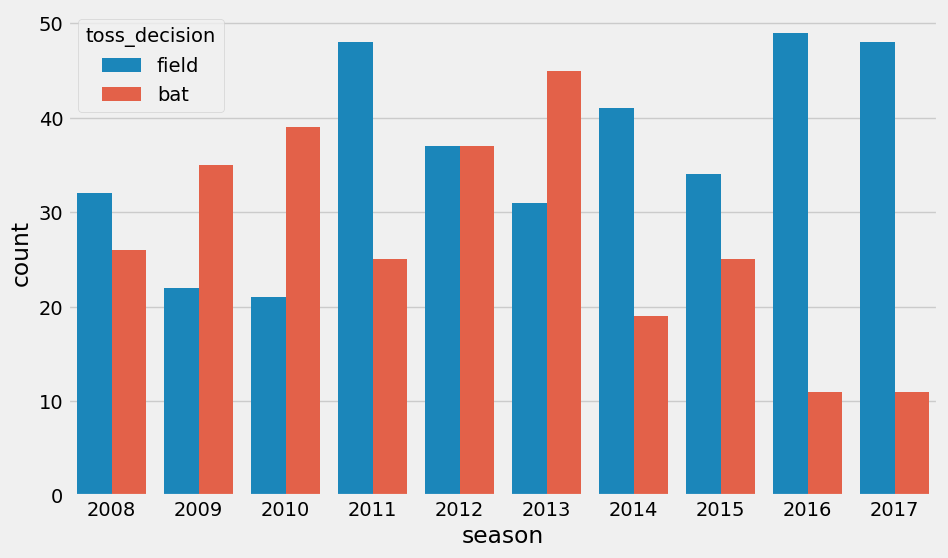

In [113]:
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=matches)
mlt.show()

The decision for batting or fielding varies largely across the seasons. In some seasons, the probablity that toss winners opt for batting is high, while it is not the case in other seasons. In 2016 though, the majority of toss winners opted for batting. 

### Maximum Toss Winners

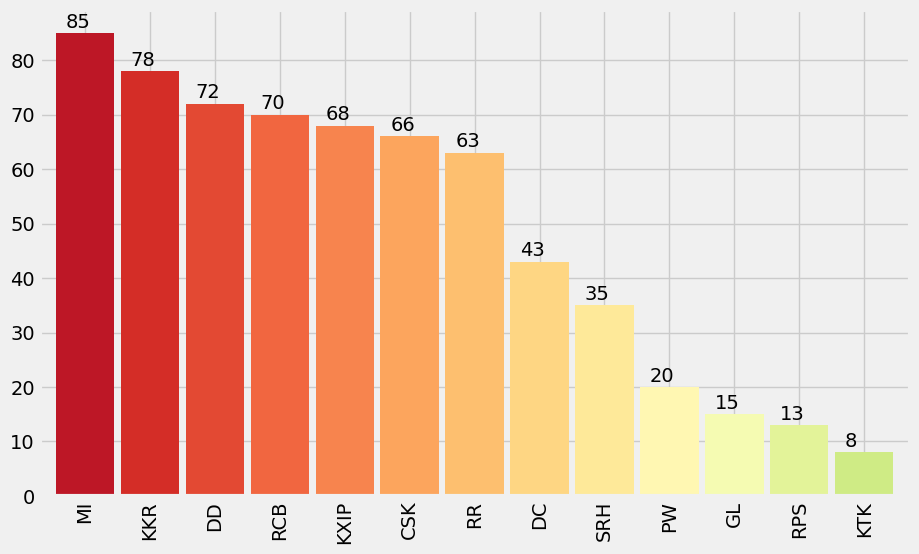

In [114]:
mlt.subplots(figsize=(10,6))
ax=matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
mlt.show()

Mumbai Indians seem to be very lucky having the higest win in tosses follwed by Kolkata Knight Riders. Pune Supergiants have the lowest wins as they have played the lowest matches also. This does not show the higher chances of winning the toss as the number of matches played by each team is uneven.

### Is Toss Winner Also the Match Winner?

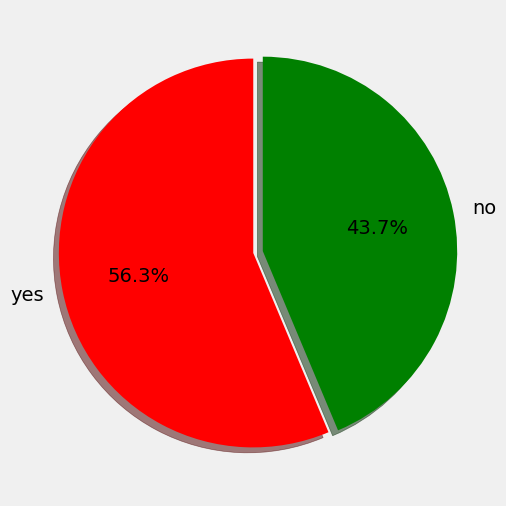

In [115]:
df=matches[matches['toss_winner']==matches['winner']]
slices=[len(df),(577-len(df))]
labels=['yes','no']
mlt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

Thus the toss winner is not necessarily the match winner. The match winning probablity for toss winnong team is about 50%-50%

##  Matches played across each season

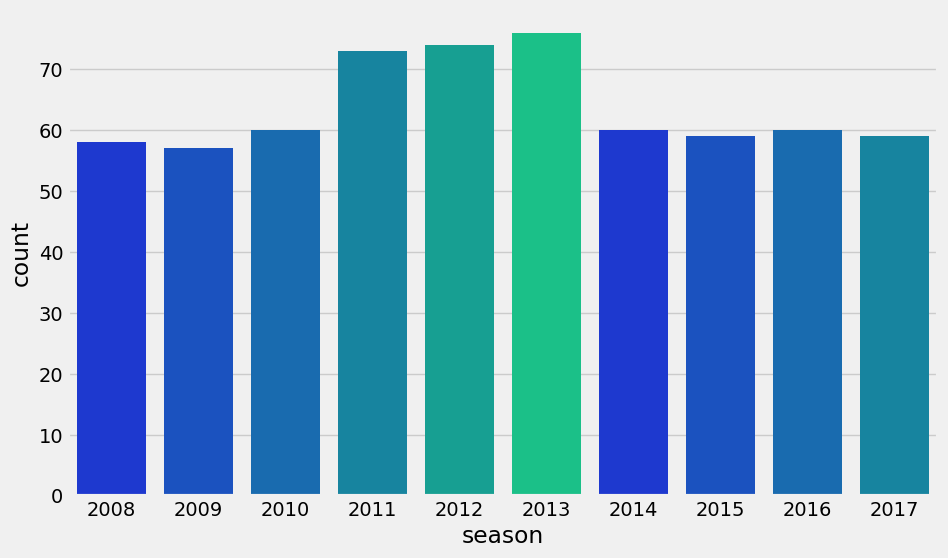

In [116]:
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',data=matches,palette=sns.color_palette('winter'))  #countplot automatically counts the frequency of an item
mlt.show()

### Runs Across the Seasons

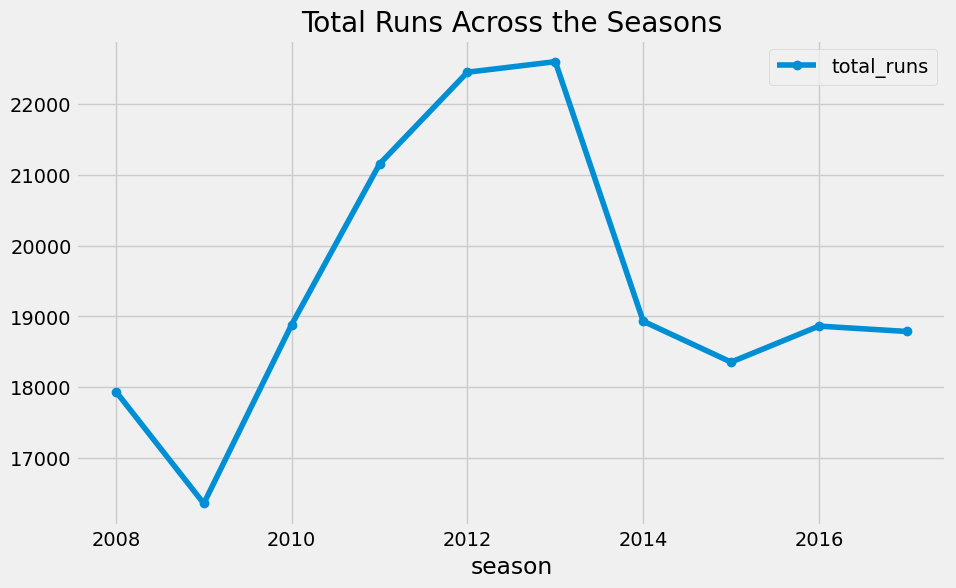

In [117]:
batsmen = matches[['id','season']].merge(delivery, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Total Runs Across the Seasons')
mlt.show()

There was a decline in total runs from 2008 to 2009.But there after there was a substantial increase in runs in every season until 2013, but from next season there was a slump in the total runs. But the number of matches are not equal in all seasons. We should check the average runs per match in each season

### Average runs per match in each Season

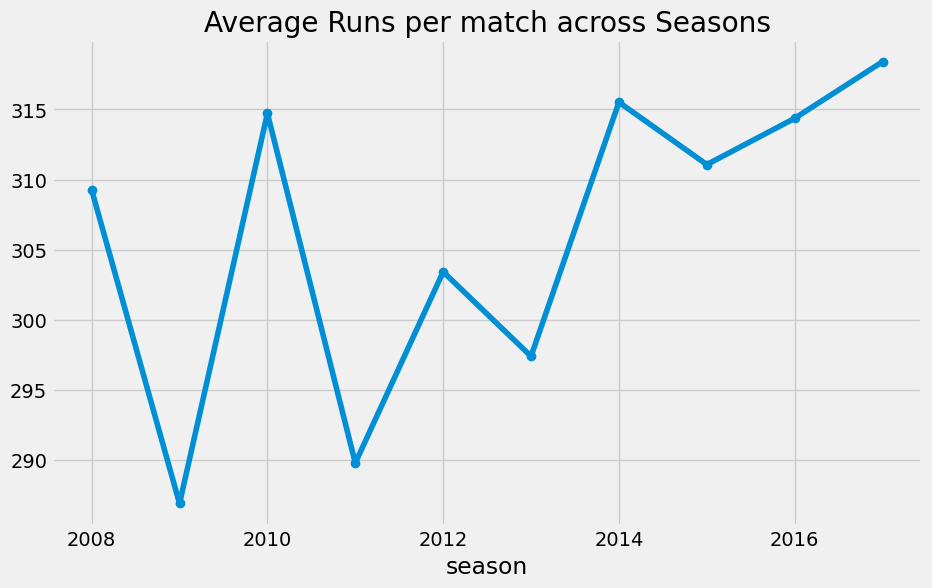

In [118]:
avgruns_each_season=matches.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']
avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Average Runs per match across Seasons')
mlt.show()

### Sixes and Fours Across the Season

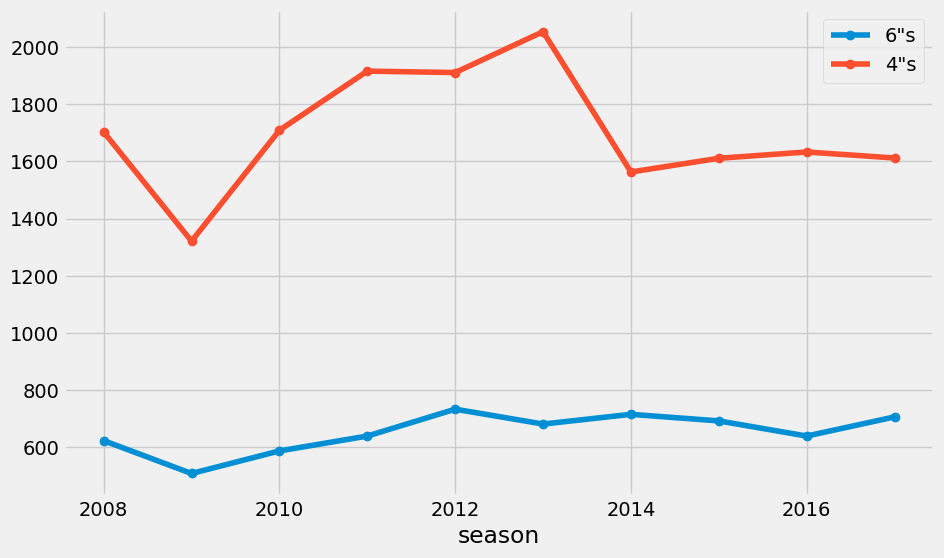

In [119]:
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker='o')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.show()

### Favorite Grounds

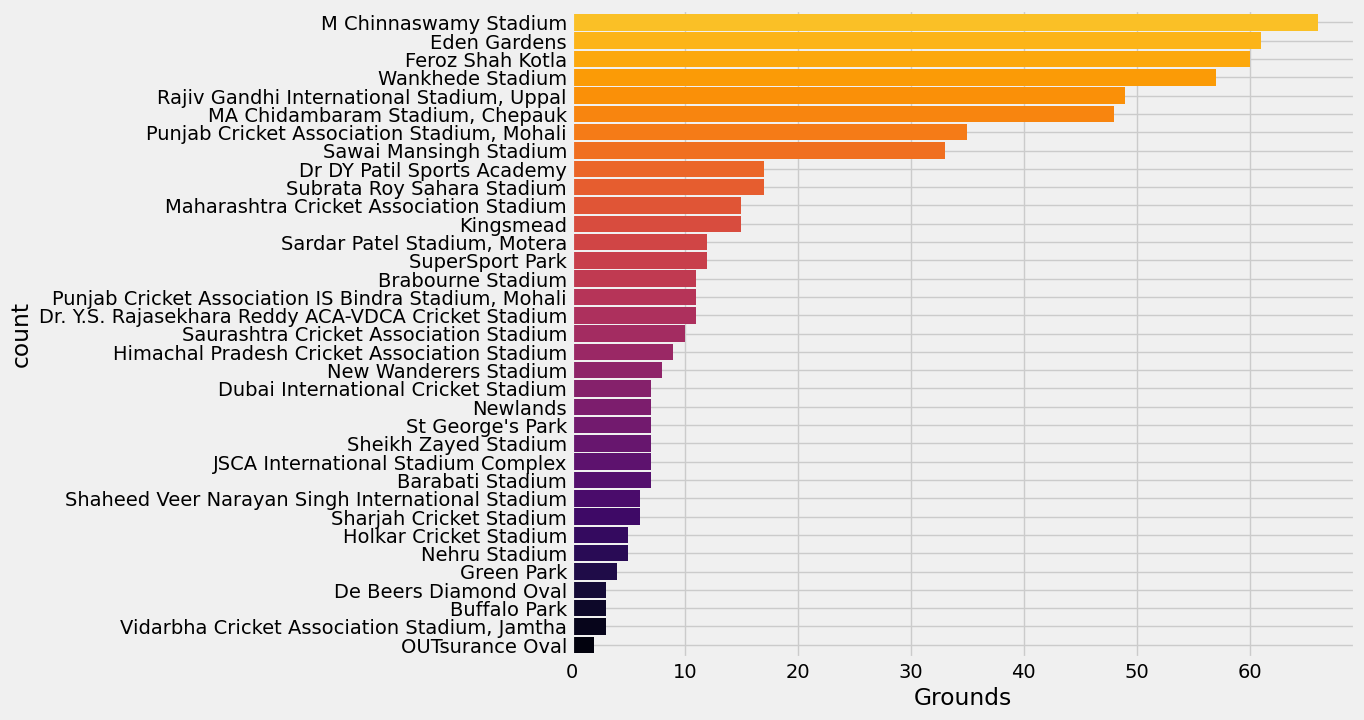

In [120]:
mlt.subplots(figsize=(9,8))
ax = matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette('inferno',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
mlt.show()

## Maximum Man Of Matches

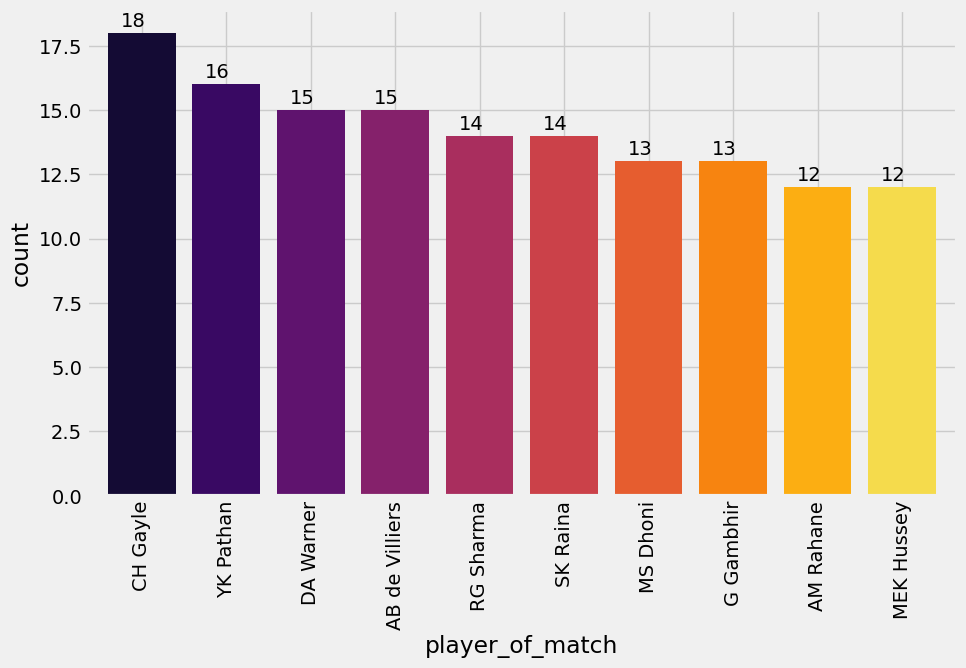

In [121]:
mlt.subplots(figsize=(10,6))
#the code used is very basic but gets the job done easily
ax = matches['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))  #counts the values corresponding 
# to each batsman and then filters out the top 10 batsman and then plots a bargraph 
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
mlt.show()

### Favorite Umpires

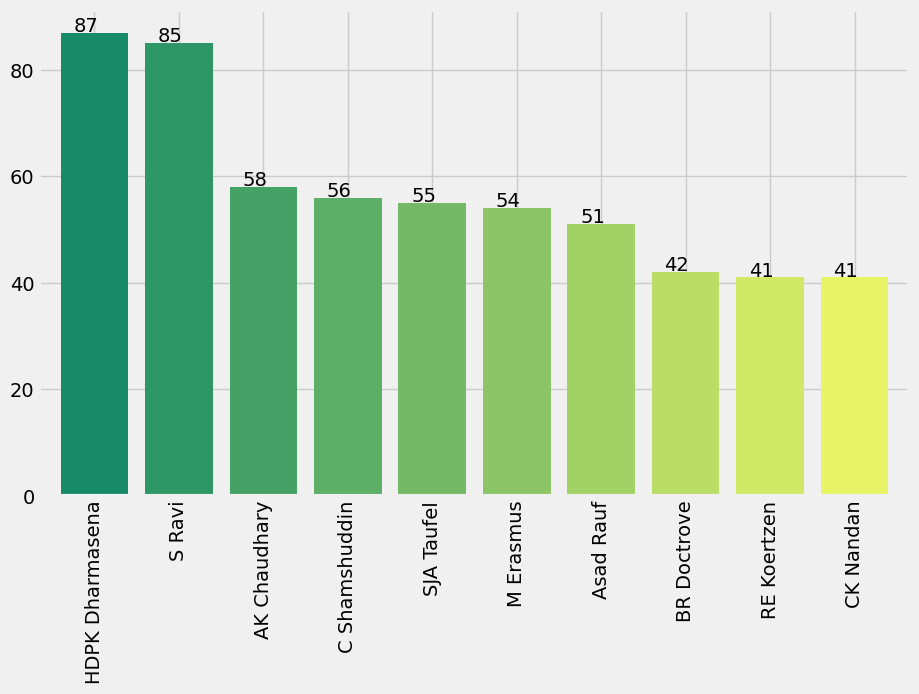

In [122]:
mlt.subplots(figsize=(10,6))
ump=pd.concat([matches['umpire1'],matches['umpire2']]) 
ax=ump.value_counts().head(10).plot.bar(width=0.8,color=sns.color_palette('summer',10))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
mlt.show()

### Top 10 Batsman 

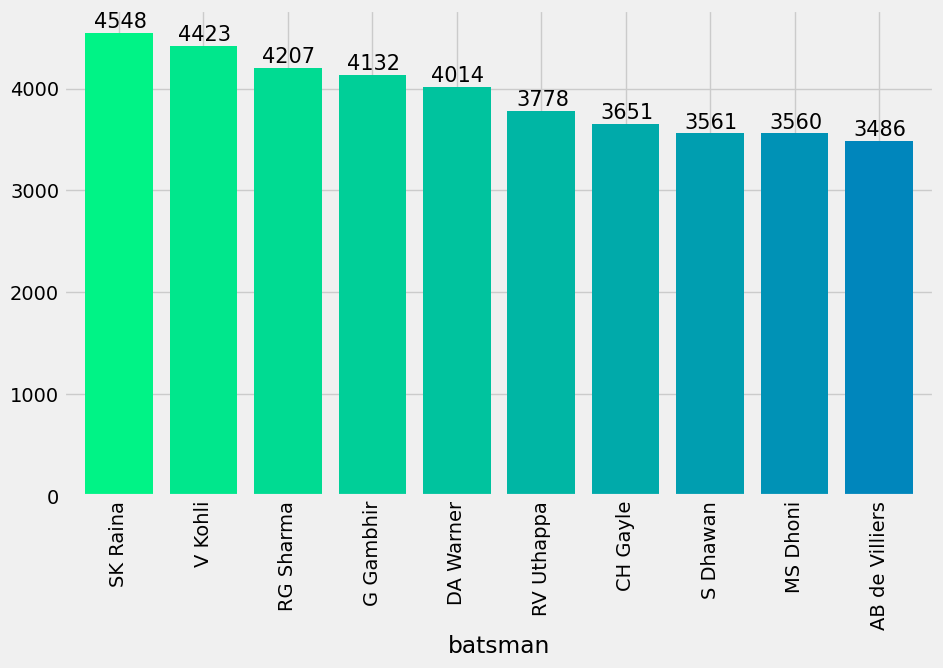

In [125]:
mlt.subplots(figsize=(10,6))
max_runs=delivery.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('winter_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
mlt.show()

Virat Kohli has highest total runs across all seasons. Raina is just few runs behind with the second spot

### Top Batsman's with 1's, 2's, 3's, 4's 

<ipython-input-126-b576e2406893>:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



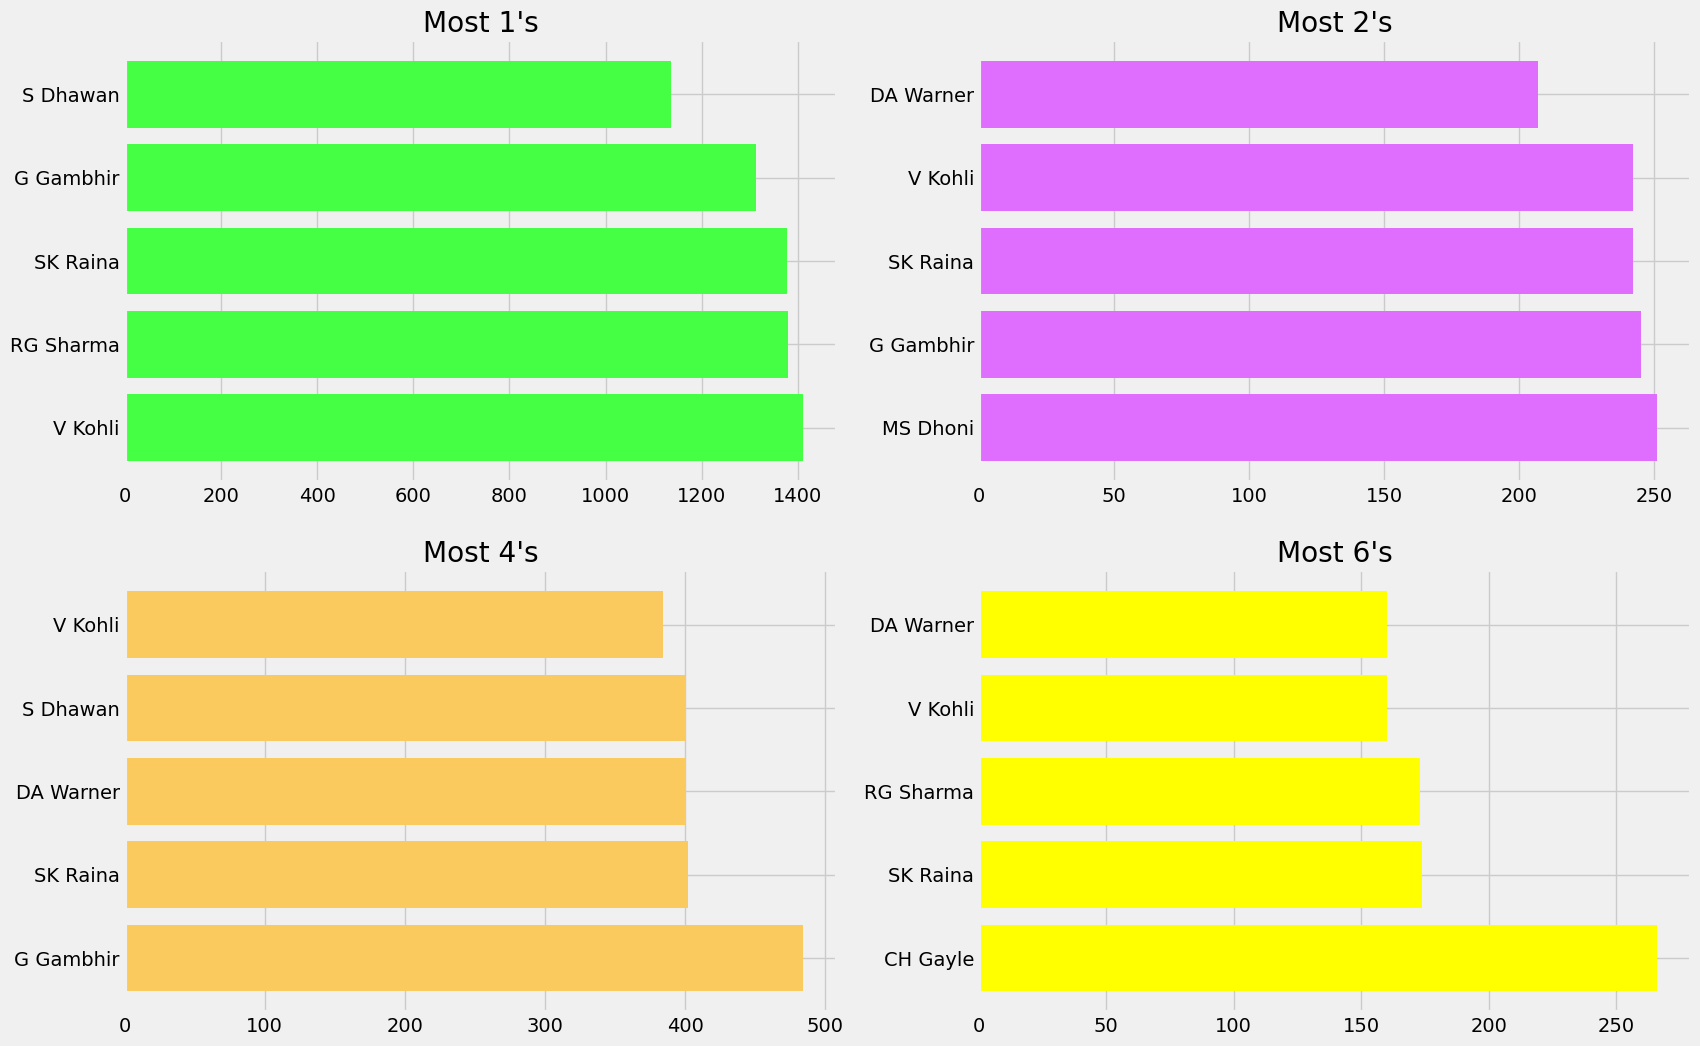

In [126]:
toppers=delivery.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
toppers=toppers.pivot('batsman','batsman_runs','total_runs')
fig,ax=mlt.subplots(2,2,figsize=(18,12))
toppers[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],color='#45ff45',width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel('')
toppers[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='#df6dfd',width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel('')
toppers[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#fbca5f',width=0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_ylabel('')
toppers[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='#ffff00',width=0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_ylabel('')
mlt.show()

**Observations:**

 1. Kohli has scored the maximum 1's
 2. Dhoni has the maximum 2's . Those Strong Legs :p
 3. Gambhir has the maximum 4's.
 4. C Gayle has the maximum 6's  and he leads by a big margin.

### Runs Scored By Batsman Across Seasons

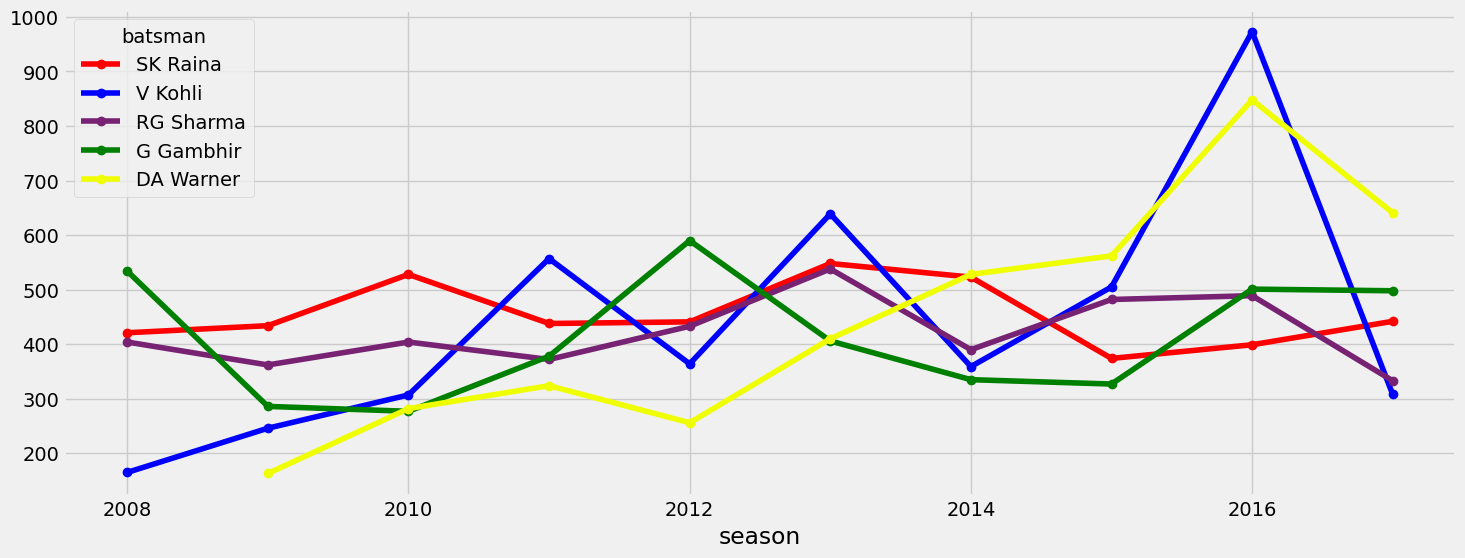

In [127]:
a=batsmen.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
a=a.groupby(['season','batsman'])['batsman_runs'].sum().unstack().T
a['Total']=a.sum(axis=1)
a=a.sort_values(by='Total',ascending=0)[:5]
a.drop('Total',axis=1,inplace=True)
a.T.plot(color=['red','blue','#772272','green','#f0ff00'],marker='o')
fig=mlt.gcf()
fig.set_size_inches(16,6)
mlt.show()

David Warner's form looks to be improving season by season. There has been a sharp decline in Kohli's Runs in the last season.

### Highest Wicket Taker

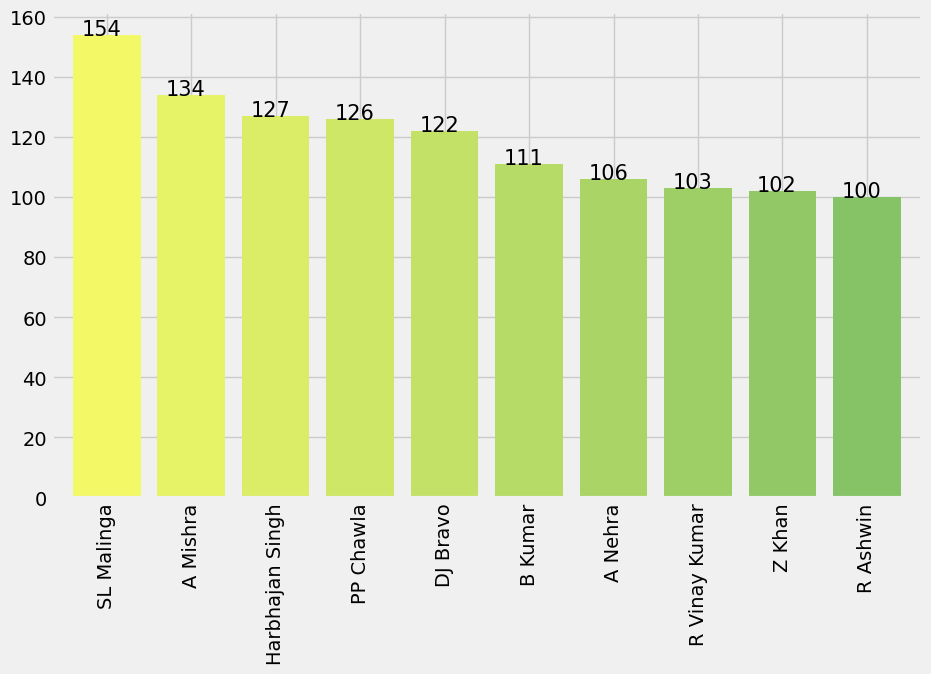

In [128]:
mlt.subplots(figsize=(10,6))
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
ct=delivery[delivery["dismissal_kind"].isin(dismissal_kinds)]
ax=ct['bowler'].value_counts()[:10].plot.bar(width=0.8,color=sns.color_palette('summer_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.10, p.get_height()),fontsize=15)
mlt.show()

Lasith Malinga leads the chart, thanks to his unpredictable bowling action. Other bowlers have a very small wicket margin between them. 